### Notebook to see if the global evolution is the product of independent local evolutions

In [4]:
import numpy as np
import pandas as pd
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import itertools
import scipy


## Define global params
J = 1.
M = 1.
beta = .15


## Define a function to calculate the hamiltonian for a given spin config
def get_H(spin_config,i):
    
    H_i = 0
    if i%2 == 0:
        H_i = -M*spin_config[i]
    else:
        H_i = -J*(spin_config[i-1]*spin_config[i]+spin_config[i]*spin_config[i+1])-M*spin_config[i]

    return(H_i)


## Define a function to return all spin configs of size n
def all_configs(n):
    final_array = []
    for i in itertools.product('01', repeat=n):
        empty_list = []
        for each in i:
            if each == '0':
                empty_list.append(-1)
            else:
                empty_list.append(1)
        final_array.append(empty_list)
    return(final_array)
    
    for i in range(np.power(2,n)):
        print(i)
        
        
## Calculate W1
spin_configs = all_configs(1)
pi_vector = []
for config in spin_configs:
    H = get_H(config,0)
    pi_vector.append(np.exp(-beta*H))
pi_vector = pi_vector/np.sum(pi_vector) ## normalize
    
PI = np.diag(pi_vector)
R = np.ones((2,2))  # assume R is a matrix of all ones
W1 = np.matmul(R,PI)-np.diag(np.matmul(R,pi_vector))

W1 = np.transpose(W1)
# Make sure columns sum to zero
for col in range(2):
    if np.abs(np.sum(W1[:,col])) > 1e-14:
        print("ERROR - cols should sum to one",np.sum(W1[col,:]))

## Same for W3        
W3 = np.copy(W1)

## Now for W2 (8x2 matrix)
spin_configs = all_configs(3)
pi_vector = []
for config in spin_configs:
    print(config)
    H = get_H(config,1)
    pi_vector.append(np.exp(-beta*H))
pi_vector = pi_vector/np.sum(pi_vector) ## normalize
    
PI = np.diag(pi_vector)
R = np.ones((8,8))  # assume R is a matrix of all ones
W2 = np.matmul(R,PI)-np.diag(np.matmul(R,pi_vector))

W2 = np.transpose(W2)
# Make sure columns sum to zero
for col in range(2):
    if np.abs(np.sum(W2[:,col])) > 1e-14:
        print("ERROR - cols should sum to one",np.sum(W2[col,:]))

        
def dp_dt(p_array,t):
    
    df = pd.DataFrame(p_array)
    
    p1_array = [df[[0,1,2,3]].sum(axis=1),df[[4,5,6,7]].sum(axis=1)]
#     p2_array = p_array
#     p3_array = 
    
#     dp1_dt = np.matmul(W1,p1_array)
#     dp2_dt = np.matmul(W2,p2_array)
#     dp3_dt = np.matmul(W3,p3_array)
    
#     ## Need to marginalize over dp2_array
#     df = pd.DataFrame(dp2_dt)
#     df["down"] = df[[0,1,4,5]].sum(axis=1)
#     df["up"] = df[[2,3,6,7]].sum(axis=1)
#     df2 = df[['down','up']]
#     p2_array = df2.to_numpy()
    
# def dp1_dt(p1_array,t):
#     return np.matmul(W1,p1_array)
# def dp2_dt(p2_array,t):
#     return np.matmul(W2,p2_array)
# def dp3_dt(p3_array,t):
#     return np.matmul(W3,p3_array)


t_array = np.linspace(0,10,100)
p1_0 = [1/2.,1/2.]
p2_0 = [1/2.,1/2.]
p3_0 = [1/4.,3/4.]
p_0 = np.tensordot(np.tensordot(p1_0,p2_0,axes=0).flatten(),p3_0,axes=0).flatten()
p_0


# print("Starting Integration...")
# p_array = scipy.integrate.odeint(dp_dt,p_0,t_array)

# ## Need to marginalize over p2_array
# df = pd.DataFrame(p2_array)
# df["down"] = df[[0,1,4,5]].sum(axis=1)
# df["up"] = df[[2,3,6,7]].sum(axis=1)
# df2 = df[['down','up']]
# p2_array = df2.to_numpy()

# p_array = []
# for i in range(len(p1_array)):
#     p1p2 = np.tensordot(p1_array[i],p2_array[i],axes=0).flatten()
#     p_array.append(np.tensordot(p1p2,p3_array[i],axes=0).flatten())

# print("Done")

[-1, -1, -1]
[-1, -1, 1]
[-1, 1, -1]
[-1, 1, 1]
[1, -1, -1]
[1, -1, 1]
[1, 1, -1]
[1, 1, 1]


array([0.0625, 0.1875, 0.0625, 0.1875, 0.0625, 0.1875, 0.0625, 0.1875])

In [2]:
### Get the global equilibrium distribution
n = 3

## Define a function to calculate the hamiltonian for a given spin config
def get_H(spin_config):
    length = len(spin_config)
    
    H_tot = 0.
    for i in range(length-1):
        H_i = 0.
        if i%2 == 0:
            H_i = -M*spin_config[i]
        else:
            H_i = -J*(spin_config[i]*spin_config[i-1]+spin_config[i]*spin_config[i+1])-M*spin_config[i]
        H_tot = H_tot + H_i    
        
    ### Calculate contribution from PBC
    H_i = 0
    if length%2 == 0:
        H_i = -J*(spin_config[-1]*spin_config[-2]+spin_config[-1]*spin_config[0])-M*spin_config[-1]
    else:
        H_i = -M*spin_config[-1]
    H_tot = H_tot + H_i

    return(H_tot)

## Define a function to return all spin configs of size n
def all_configs(n):
    final_array = []
    for i in itertools.product('01', repeat=n):
        empty_list = []
        for each in i:
            if each == '0':
                empty_list.append(-1)
            else:
                empty_list.append(1)
        final_array.append(empty_list)
    return(final_array)
    
    for i in range(np.power(2,n)):
        print(i)


## Calculate Rate Matrix W
spin_configs = all_configs(n)
pi_vector = []
for config in spin_configs:
    H = get_H(config)
    print(config,H)
    pi_vector.append(np.exp(-beta*H))
pi_vector = pi_vector/np.sum(pi_vector) ## normalize
print("Global Equilibrium Dist:\n",pi_vector)

[-1, -1, -1] 1.0
[-1, -1, 1] 1.0
[-1, 1, -1] 3.0
[-1, 1, 1] -1.0
[1, -1, -1] 1.0
[1, -1, 1] 1.0
[1, 1, -1] -1.0
[1, 1, 1] -5.0
Global Equilibrium Dist:
 [0.10100868 0.10100868 0.07482907 0.13634746 0.10100868 0.10100868
 0.13634746 0.24844127]


Starting...


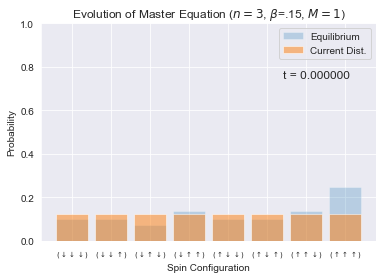

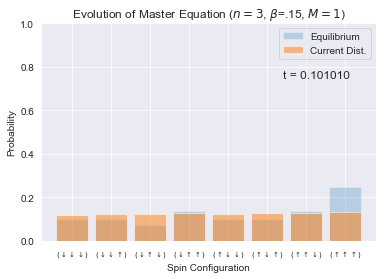

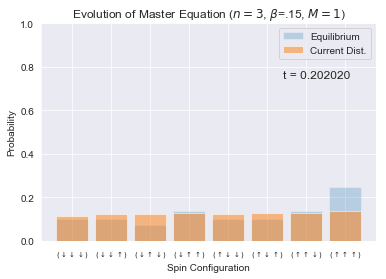

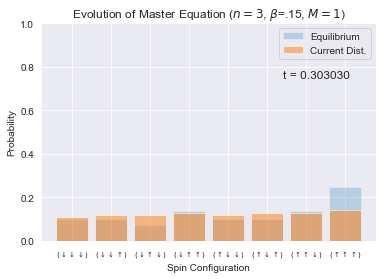

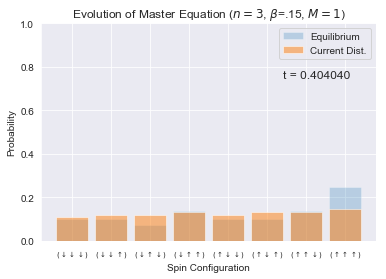

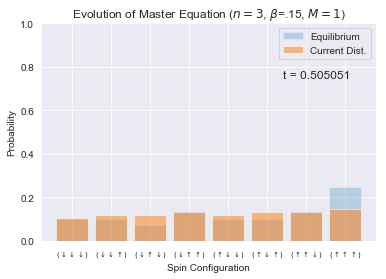

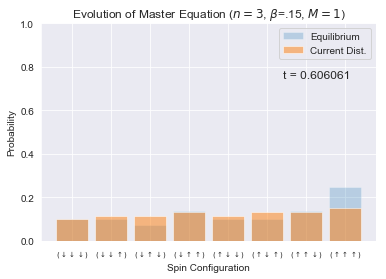

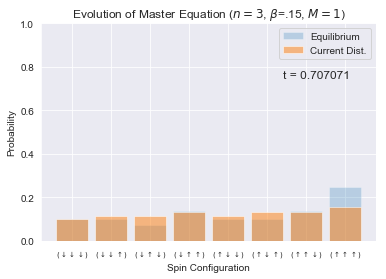

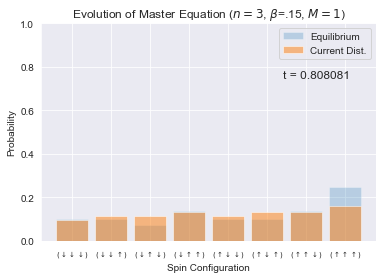

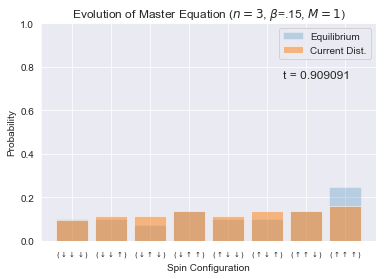

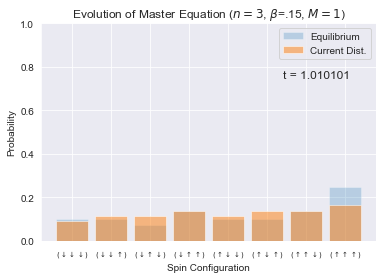

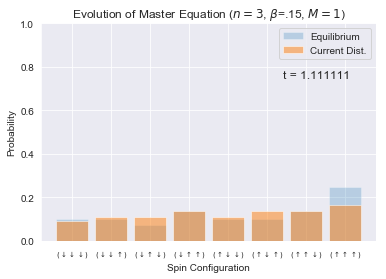

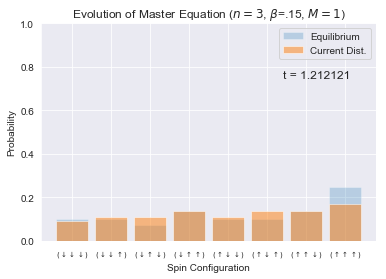

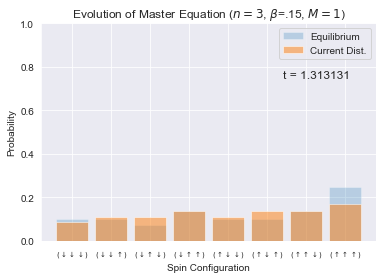

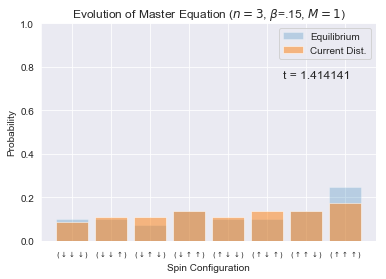

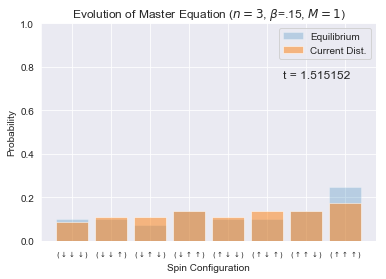

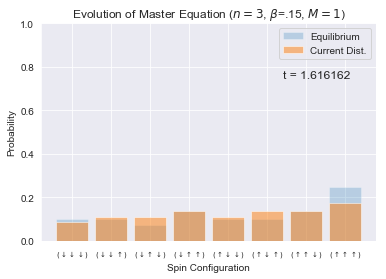

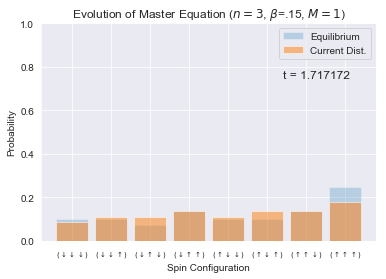

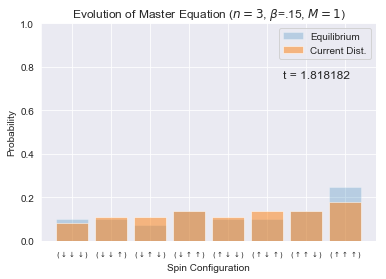

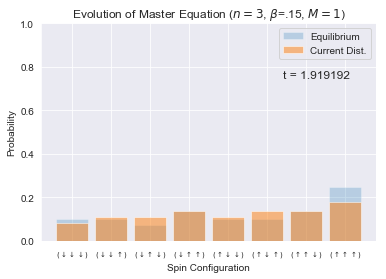

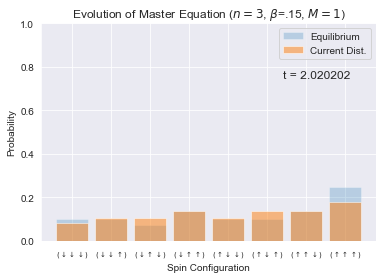

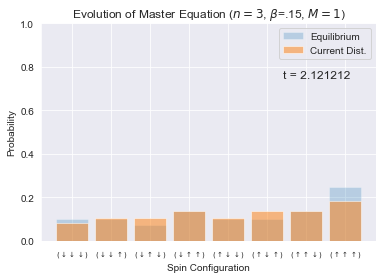

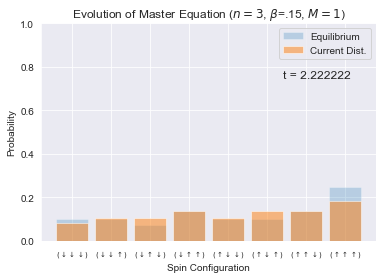

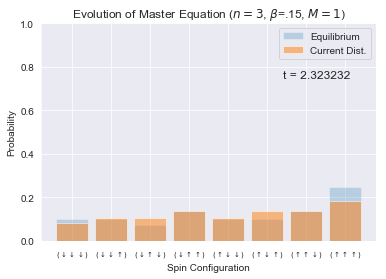

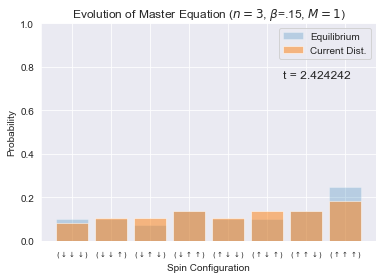

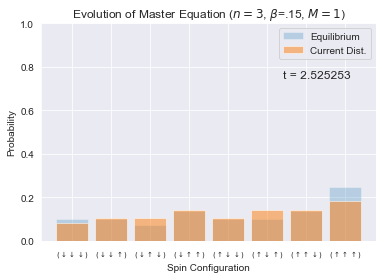

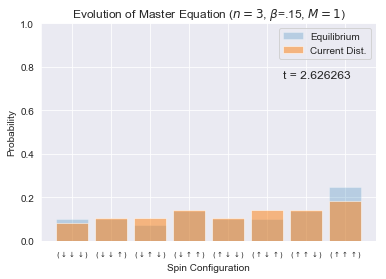

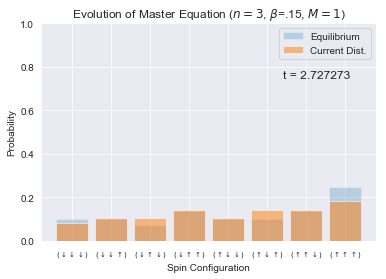

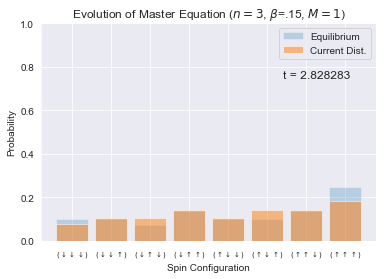

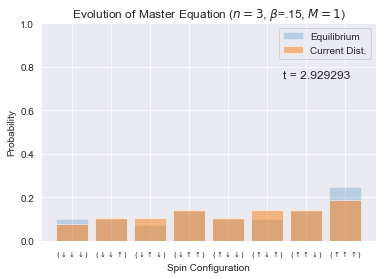

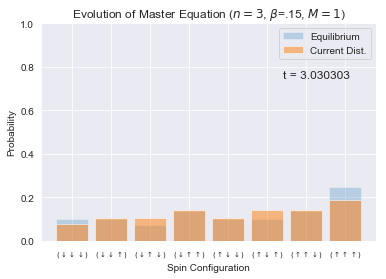

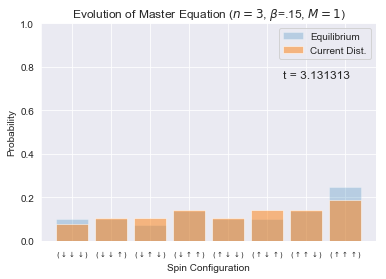

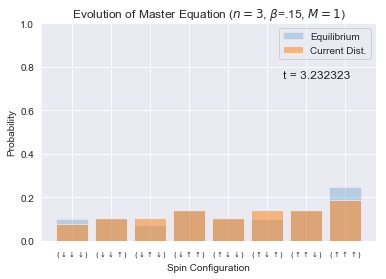

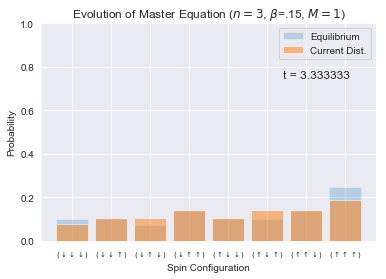

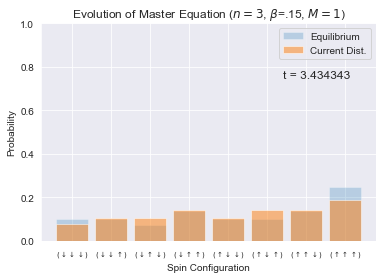

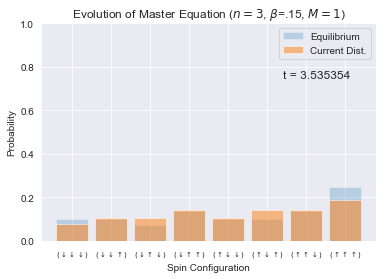

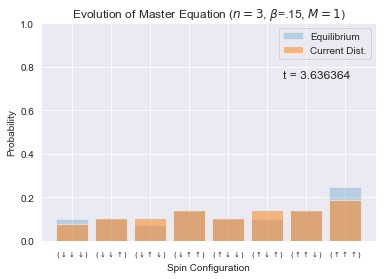

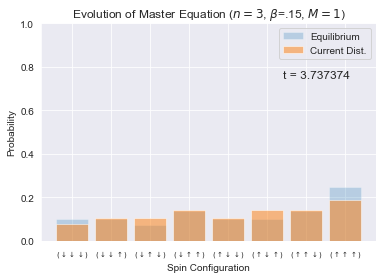

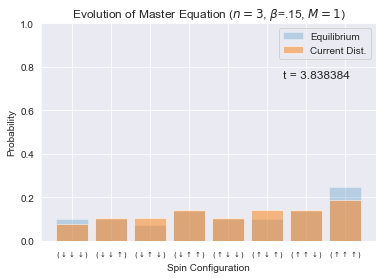

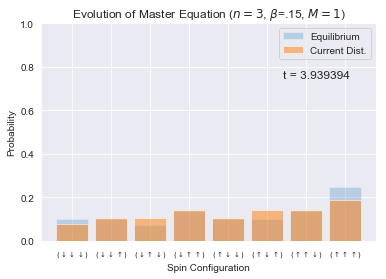

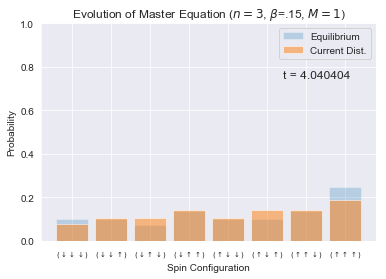

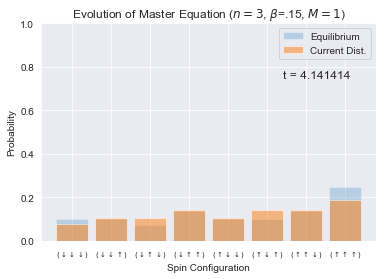

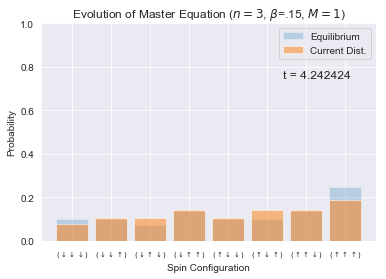

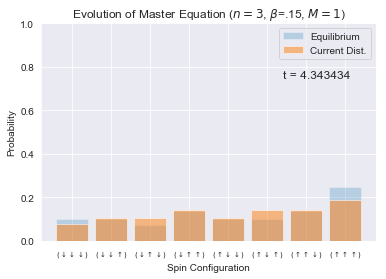

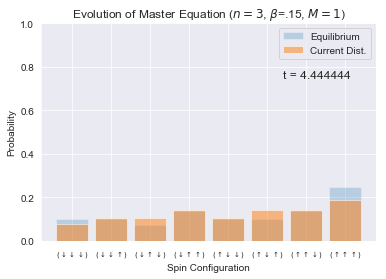

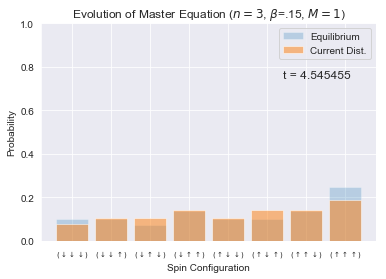

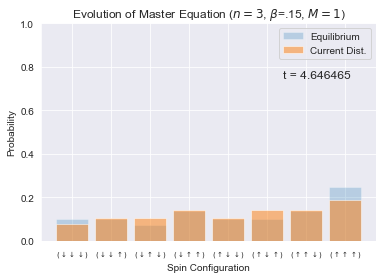

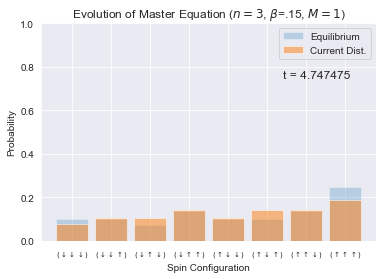

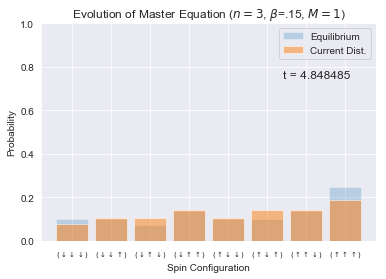

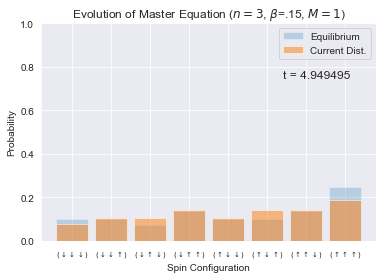

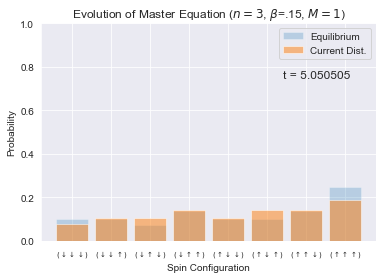

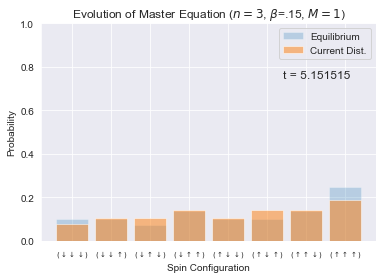

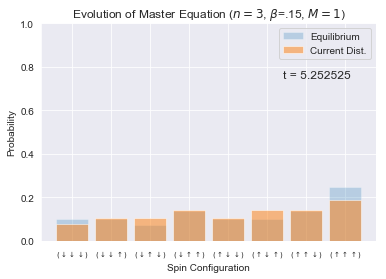

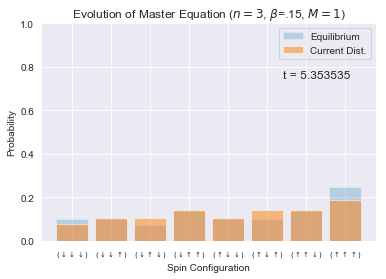

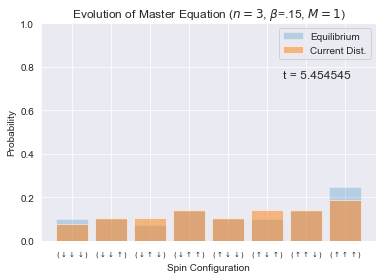

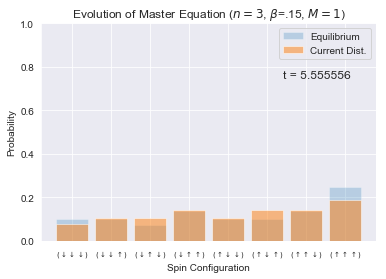

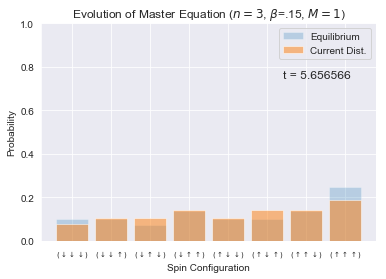

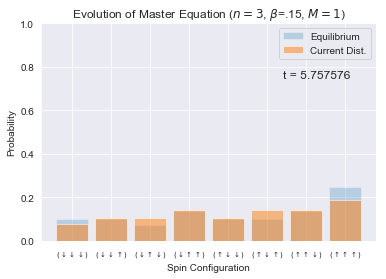

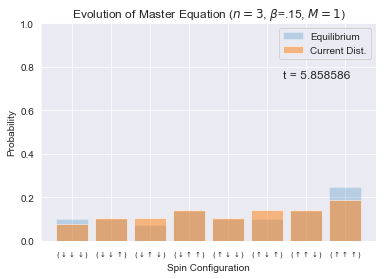

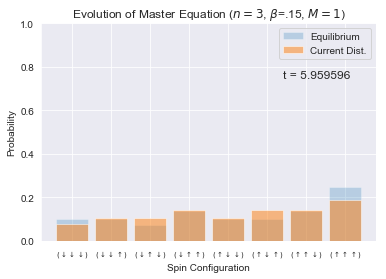

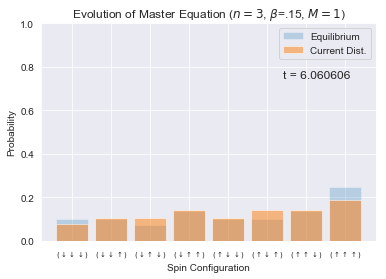

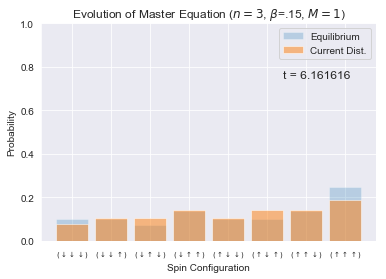

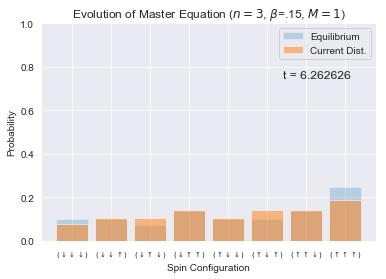

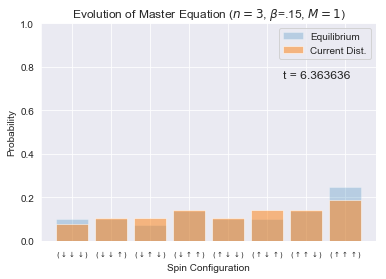

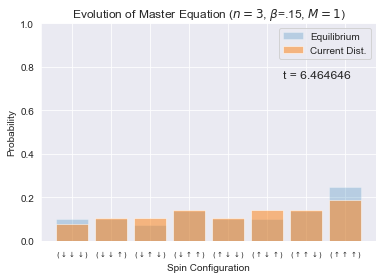

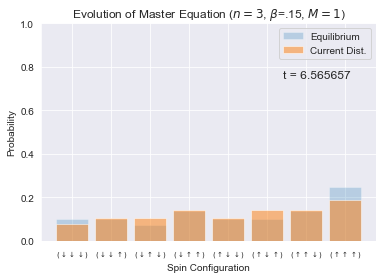

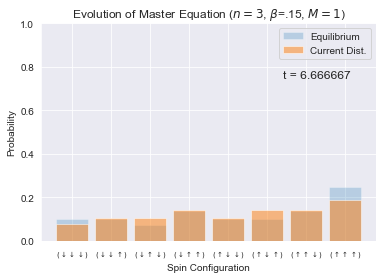

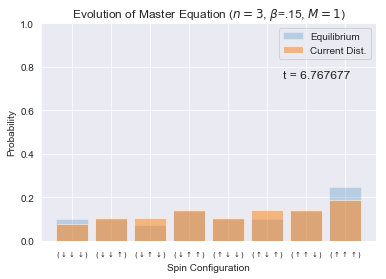

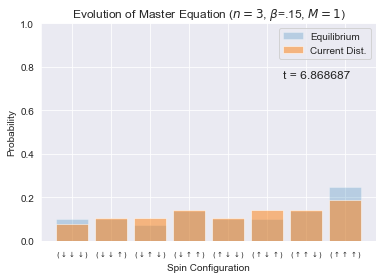

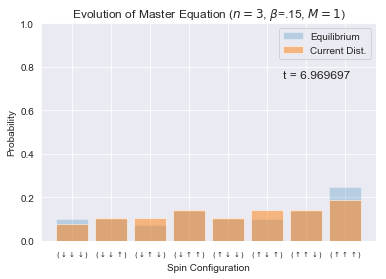

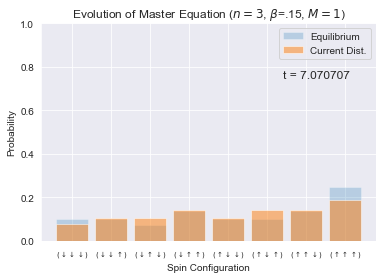

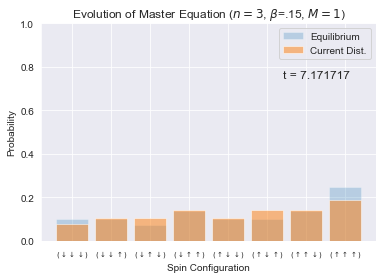

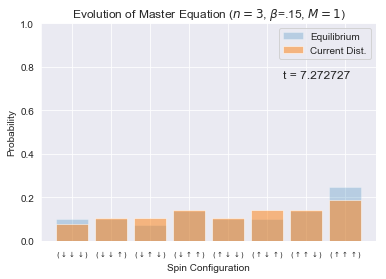

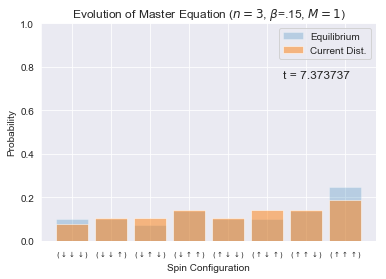

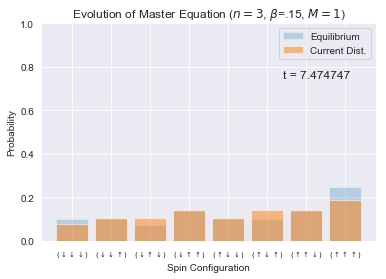

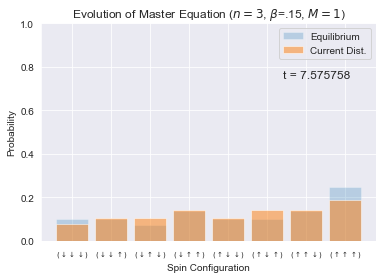

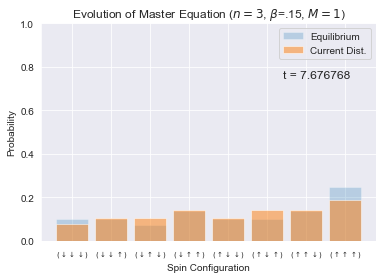

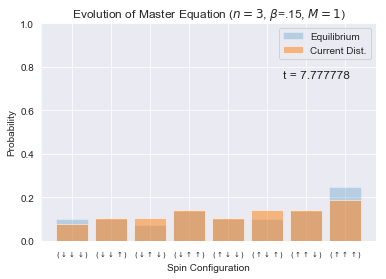

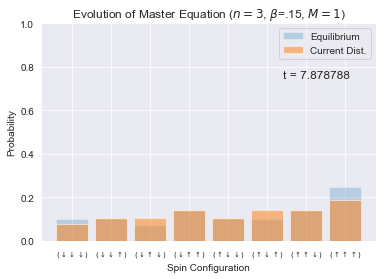

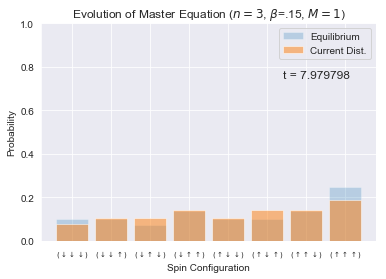

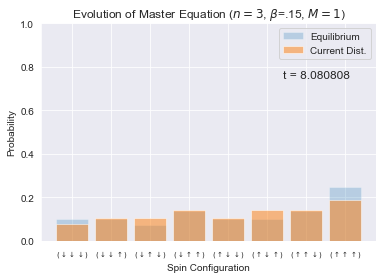

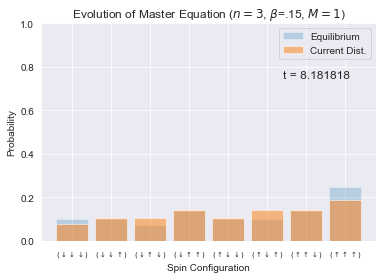

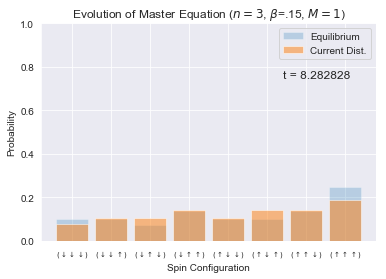

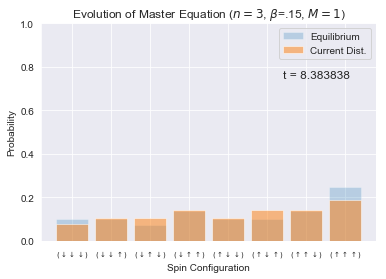

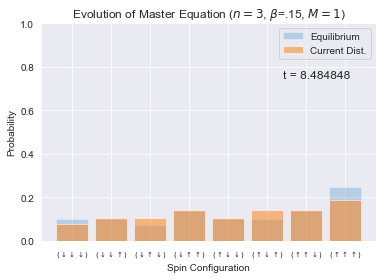

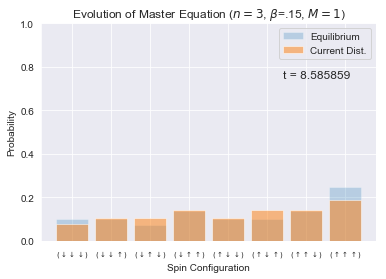

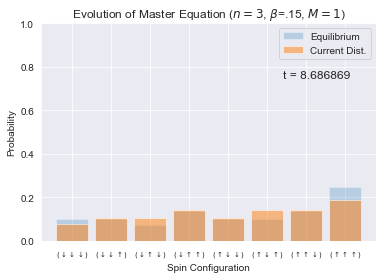

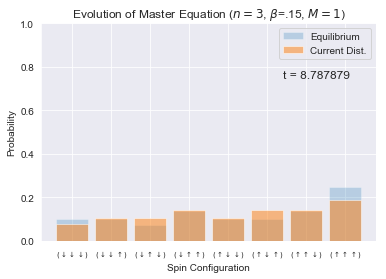

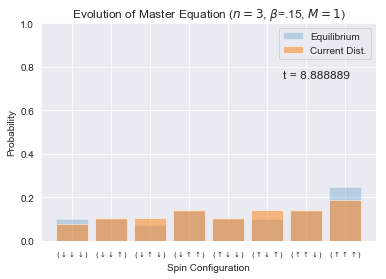

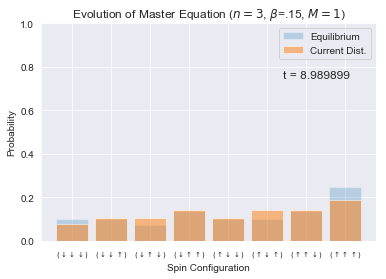

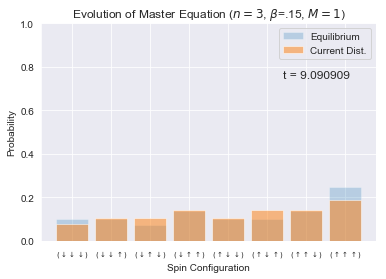

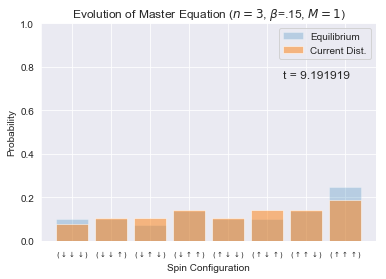

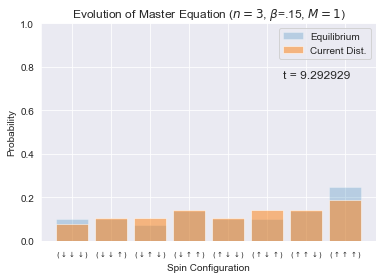

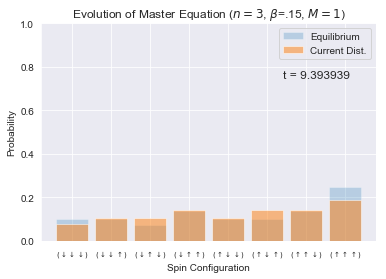

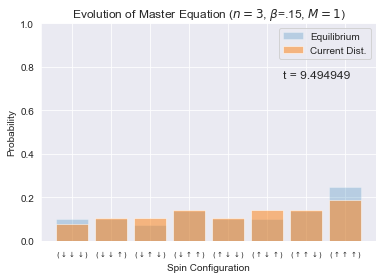

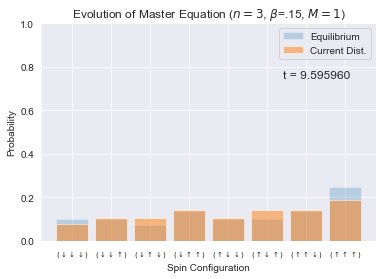

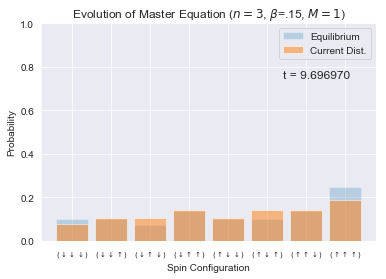

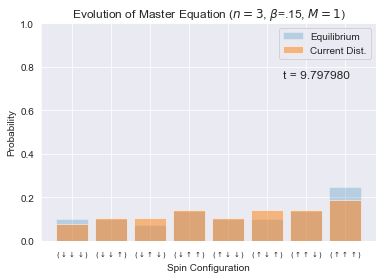

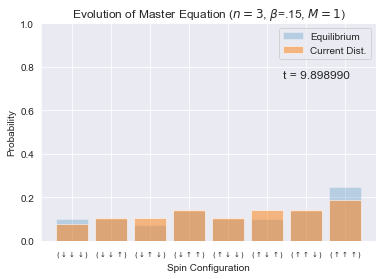

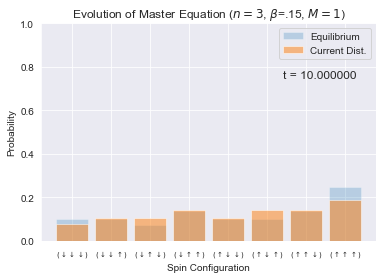

Done


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

print("Starting...")
for i in range(np.shape(p_array)[0]):
    plt.bar(np.arange(len(p_array[0])),pi_vector,alpha=0.25,label='Equilibrium')
    plt.bar(np.arange(len(p_array[0])),p_array[i],alpha=0.5,label='Current Dist.')
    plt.xticks(np.arange(len(p_array[0])),[r'$(\downarrow\downarrow\downarrow)$',r'$(\downarrow\downarrow\uparrow)$',r'$(\downarrow\uparrow\downarrow)$',r'$(\downarrow\uparrow\uparrow)$',r'$(\uparrow\downarrow\downarrow)$',r'$(\uparrow\downarrow\uparrow)$',r'$(\uparrow\uparrow\downarrow)$',r'$(\uparrow\uparrow\uparrow)$'],size=7)
    plt.annotate('t = {:f}'.format(t_array[i]),(5.4,0.75),size=12)
    plt.ylabel('Probability')
    plt.xlabel('Spin Configuration')
    plt.title(r'Evolution of Master Equation ($n=3$, $\beta$=.15, $M=1$)')
    fname = 'file_'+'{:04d}'.format(i)+'.png'
    plt.ylim((0.0,1.0))
    plt.legend()
    plt.savefig('/Users/jakehanson/Desktop/Stochastic_Thermo/Code/gif_data/'+fname)
    plt.show()
print("Done")

In [36]:
p_array[-10:-1]

[array([0.07707267, 0.10403365, 0.10403365, 0.14042591, 0.10403365,
        0.14042591, 0.14042591, 0.18954865]),
 array([0.07707223, 0.1040334 , 0.1040334 , 0.14042604, 0.1040334 ,
        0.14042604, 0.14042604, 0.18954945]),
 array([0.07707183, 0.10403317, 0.10403317, 0.14042616, 0.10403317,
        0.14042616, 0.14042616, 0.18955017]),
 array([0.07707147, 0.10403297, 0.10403297, 0.14042626, 0.10403297,
        0.14042626, 0.14042626, 0.18955082]),
 array([0.07707115, 0.10403279, 0.10403279, 0.14042636, 0.10403279,
        0.14042636, 0.14042636, 0.18955141]),
 array([0.07707086, 0.10403262, 0.10403262, 0.14042644, 0.10403262,
        0.14042644, 0.14042644, 0.18955195]),
 array([0.07707059, 0.10403247, 0.10403247, 0.14042652, 0.10403247,
        0.14042652, 0.14042652, 0.18955243]),
 array([0.07707035, 0.10403234, 0.10403234, 0.14042659, 0.10403234,
        0.14042659, 0.14042659, 0.18955286]),
 array([0.07707014, 0.10403221, 0.10403221, 0.14042665, 0.10403221,
        0.14042665, 

In [35]:
pi_vector

array([0.10100868, 0.10100868, 0.07482907, 0.13634746, 0.10100868,
       0.10100868, 0.13634746, 0.24844127])

### Can't evolve spins autonomously according to their own rate matrix. Must couple differential equations